# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Описание данных
**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м) <br>
**balcony** — число балконов<br>
**ceiling_height** — высота потолков (м)<br>
**cityCenters_nearest** — расстояние до центра города (м)<br>
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)<br>
**first_day_exposition** — дата публикации<br>
**floor** — этаж<br>
**floors_total** — всего этажей в доме<br>
**is_apartment** — апартаменты (булев тип)<br>
**kitchen_area** — площадь кухни в квадратных метрах (м²)<br>
**last_price** — цена на момент снятия с публикации<br>
**living_area** — жилая площадь в квадратных метрах (м²)<br>
**locality_name** — название населённого пункта<br>
**open_plan** — свободная планировка (булев тип)<br>
**parks_around3000** — число парков в радиусе 3 км<br>
**parks_nearest** — расстояние до ближайшего парка (м)<br>
**ponds_around3000** — число водоёмов в радиусе 3 км<br>
**ponds_nearest** — расстояние до ближайшего водоёма (м)<br>
**rooms** — число комнат<br>
**studio** — квартира-студия (булев тип)<br>
**total_area** — общая площадь квартиры в квадратных метрах (м²)<br>
**total_images** — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [3]:
import pandas as pd #импортируем бибилотеки
import matplotlib.pyplot as plt

In [4]:
#путь к файлу
local_path = 'real_estate_data.csv' #локальный путь
default_path = '/datasets/real_estate_data.csv' #для проверки

#попытка прочитать файл
try:
    data = pd.read_csv(default_path, sep='\t')
    print('Файл успешно загружен с локального пути')
except FileNotFoundError:
    try:
        data = pd.read_csv(local_path, sep='\t')
        print('Файл успешно загружен с пути для проверок')
    except FileNotFoundError:
        print('Файл не найден ни по одному из путей')
pd.set_option('display.max_columns', None)
data.head()

Файл успешно загружен с пути для проверок


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
#выведем общую информацию о файле
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Первое знакомство с данными показывает, что необходимо провести Предобработку данных: на это указывает неправильное название столбцов, неотраженность типа datetime в столбце с датой публикации (first_day_exposition) и т.д.
#### В ходе дальнейшего анализа и обработки данных будет проведено Исследование объявлений о продаже квартир


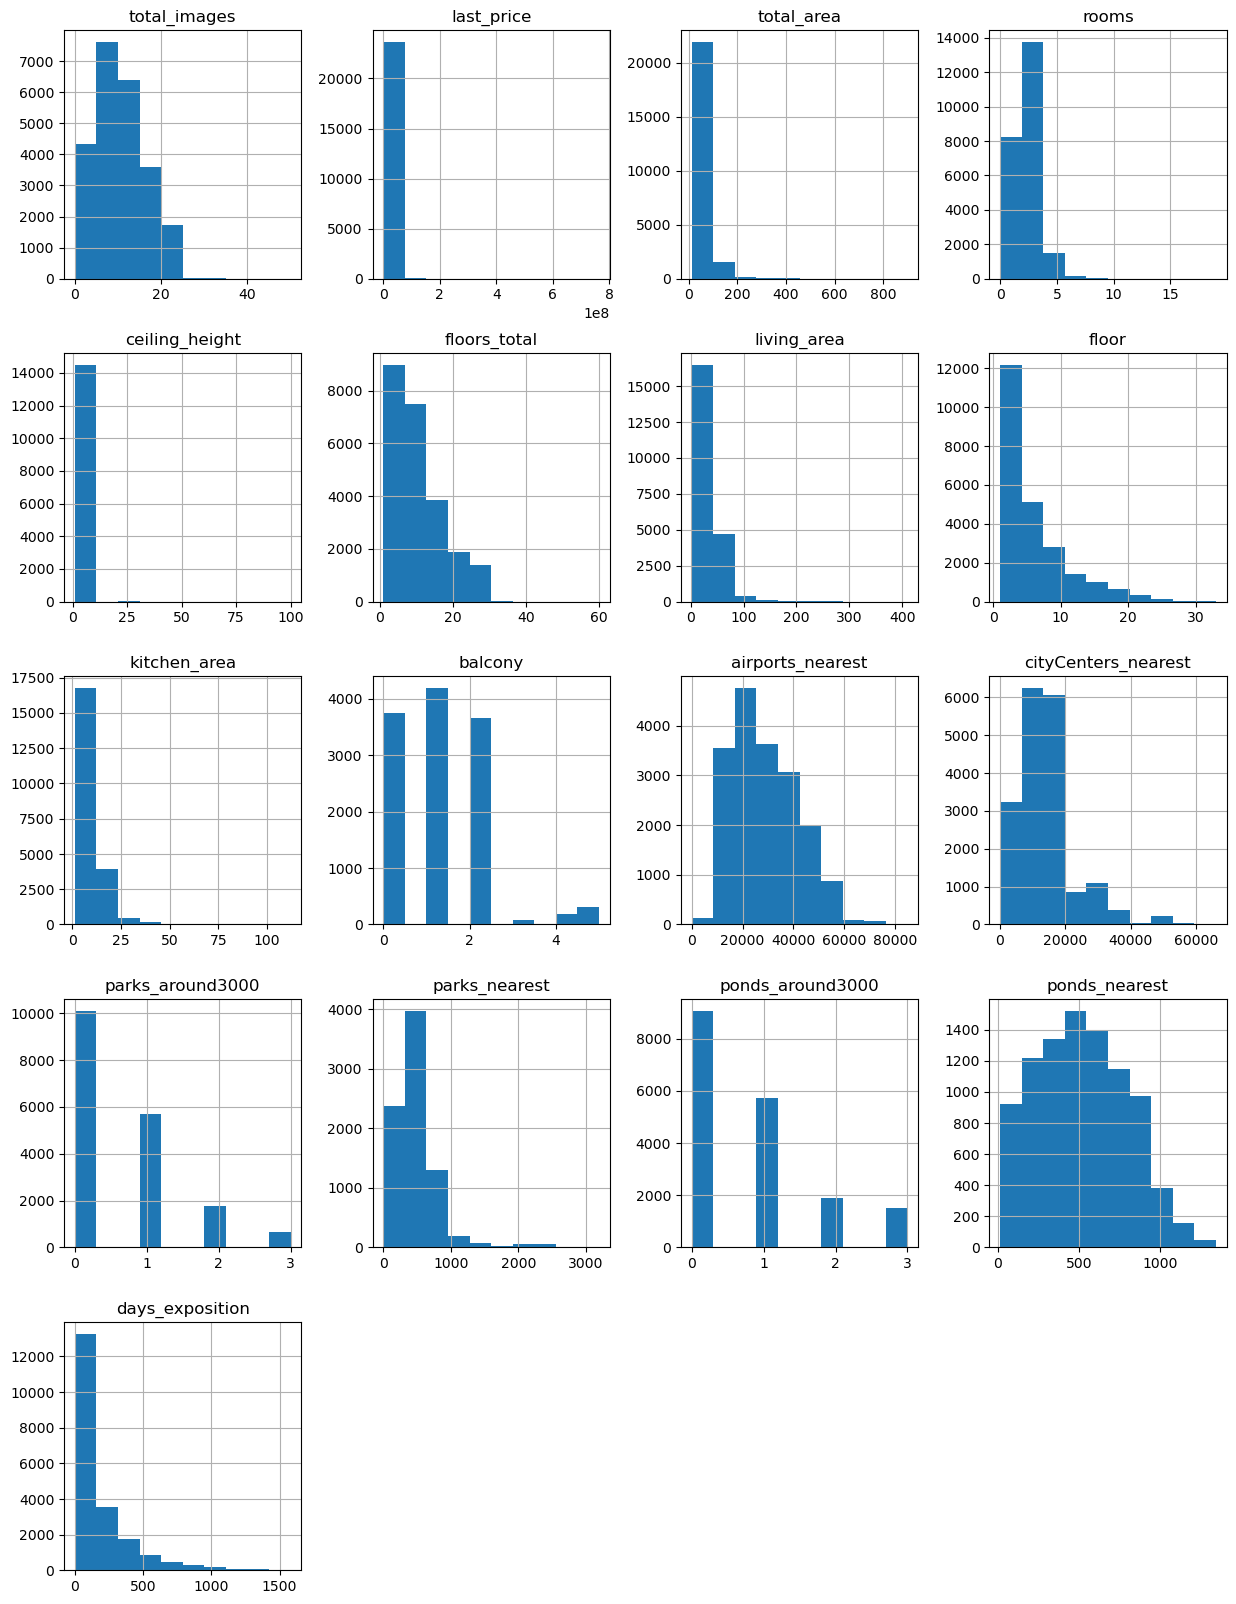

In [7]:
data.hist(figsize=(15, 20)); #построим гистограмму для всех стоблцов датафрейма

In [8]:
data.isna().sum() #пропущенные значения в каждом из столбцов

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data.duplicated().sum() #проверка на явные дубликаты

0

### Вывод по первому знакомству с датафреймом
В файле 23699 записи, 22 столбца, присутствует некорректный тип столбца, присутствуют пропущенные значения в большинстве столбцов, отсутствуют явные дубликаты. Перейдем к Предобработке данных

### Выполните предобработку данных

**1. Рассмотрим названия столбцов**

In [13]:
data.columns #видим, что cityCenters_nearest записано неверно

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [14]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace=True) #заменили на правильное название
data.columns #проверили выводом названий столбцов 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**2. Рассмотрим пропущенные значения в столбцах (с объяснениями)**

In [16]:
data.isna().sum() #вновь выведем количество всех пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

*Первый столбец, в котором пропущены значения – это высота потолков (**ceiling_height**). Заменем пропущенные значения в данном столбце на медианную высоту потолков во всем датасете*

In [18]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean().round(2)) #заменем с округлением до двух знаков после запятой
data['ceiling_height'].isna().sum() #проверим, всё ли заполнилось 

0

In [19]:
data['ceiling_height'].sort_values(ascending=False).head(25) #проверим данные, есть ли здесь явные аномалии

22869    100.0
3148      32.0
22336     32.0
21377     27.5
10773     27.0
5807      27.0
17857     27.0
22938     27.0
21824     27.0
5246      27.0
4876      27.0
20478     27.0
5669      26.0
18545     25.0
11285     25.0
6246      25.0
9379      25.0
4643      25.0
14382     25.0
355       25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
Name: ceiling_height, dtype: float64

*Видно, что высота потолков некоторых квартир достигает более 15 метров, что является слишком странным и неправдоподобным. Скорее всего, это связано с ошибкой в заполнении таблицы или переносе данных, и значения ввелись в сантиметрах. Для этого поделим значения больше 15 на 10 см*

In [21]:
data['ceiling_height'].loc[data['ceiling_height'] > 15] = data['ceiling_height'] / 10
data['ceiling_height'].sort_values(ascending=False).head() #проверим данные – теперь всё хорошо

C:\Users\HP\AppData\Local\Temp\ipykernel_2388\3357362759.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['ceiling_height'].loc[data['ceiling_height'] > 15] = data['ceiling_height'] / 10
C:\Users\HP\AppData\Local\Temp\ipykernel_2388\

15061    14.0
22309    10.3
22869    10.0
5863      8.3
17442     8.0
Name: ceiling_height, dtype: float64

*Следующий столбец с пропущенными значениями – **floors_total** (количество этажей в доме)*

In [23]:
data[data['floors_total'].isna()] #выведем на экран строки, в которых пропущены значения в столбце

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.77,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.77,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.77,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.77,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.77,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.77,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.77,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.77,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


*Мы не можем точно сказать, какое конкретное количество этажей находится в том или ином доме. Безусловно, мы понимаем, что максимальное количество этажей больше или равно тому, на котором расположена квартира, но конкретную цифру назвать нельзя. Также мы можем попробовать заменить значение на медианное, но это исказит общие данные, особенно если квартира находится на этаже выше, чем медианное значение. Именно поэтому оставим пропущенные данные в столбцах, к тому же этих строк немного (86 из 23699), данная выборка почти не повлияет на дальнейший анализ*

*Следующий столбец с пропущенными значениями – **living_area** (жилая площадь в квадратных метрах (м²)) <br>
Нам необходимо заполнить пропуски. Для этого разделим датасет на 6 подгрупп по площади по столбцу **total_area**, к каждой группе найдем меидану и заполним ею пропуски*

In [26]:
data['total_area'].sort_values(ascending=False).head(10)

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

In [27]:
#создание функции для присвоения групп на основе total_area
def assign_group(total_area):
    if total_area <= 150:
        return 'до 150'
    elif total_area <= 300:
        return 'от 151 до 300'
    elif total_area <= 450:
        return 'от 301 до 450'
    elif total_area <= 600:
        return 'от 451 до 600'
    elif total_area <= 750:
        return 'от 601 до 750'
    elif total_area <= 900:
        return 'от 751 до 900'
    else:
        return 'больше 900'

#применение функции к столбцу total_area
data['total_area_group'] = data['total_area'].apply(assign_group)

In [28]:
#функция для заполнения пропусков в столбце living_area медианным значением группы
def fill_missing_living_area(data):
    groups = data['total_area_group'].unique()
    for group in groups:
        median_value = data[data['total_area_group'] == group]['living_area'].median()
        data.loc[(data['total_area_group'] == group) & (data['living_area'].isna()), 'living_area'] = median_value
    return data

#применение функции к датасету
data = fill_missing_living_area(data)

In [29]:
data['living_area'].isna().sum() #убедились, что всё заполнили

0

*Следующий столбец с пропущенными значениями – **is_apartment** (апартаменты (булев тип)) <br>
Для того, чтобы заполнить пропуски в данном столбце, необходимо сначала посчитать общую долю аппартаментов (т.к. True равно по значению 1)*

In [31]:
data['is_apartment'].mean().round(3)

0.018

*Видно, что доля равна 0,018 – это примерно 2% из всего датасета квартиры имеют статус "апартаменты", что логически похоже на верную трактовку. Скорее всего, при заполнении таблицы человек или машина автоматически пропускали данный столбец, считая, что если не указал ничего, то, значит, **False**. Поэтому заполним пропущенный данные **"False"***

In [33]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].dtype #убедились, что тип bool сохранился

C:\Users\HP\AppData\Local\Temp\ipykernel_2388\2290678740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


dtype('bool')

*Следующий столбец с пропущенными значениями – **kitchen_area** (площадь кухни в квадратных метрах (м²)) <br>
Заполним его по аналогии с медианной площадью квартиры в группе*

In [39]:
#функция для заполнения пропусков в столбце kitchen_area медианным значением группы
def fill_missing_living_area(data):
    groups = data['total_area_group'].unique()
    for group in groups:
        median_value = data[data['total_area_group'] == group]['kitchen_area'].median()
        data.loc[(data['total_area_group'] == group) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_value
    return data

#применение функции к датасету
data = fill_missing_living_area(data)

In [40]:
data['kitchen_area'].isna().sum() #убеждение, что всё удалено

0

In [41]:
data.isna().sum() #вновь выведем количество всех пропущенных значений для удобства

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
total_area_group            0
dtype: int64

*Следующий столбец с пропущенными значениями – **balcony** (число балконов) <br>
Скорее всего, в квартире нет балкона, поэтому владелец квартиры или составитель таблицы решил не вписывать число балконов, именно поэтому заменем пропущенные значение столбца на 0*

In [43]:
data['balcony'] = data['balcony'].fillna(0) #замена пропущенных значений на ноль
data['balcony'].isna().sum() #проверка полного заполнения столбца

0

*Следующий столбец с пропущенными значениями – **locality_name** (название населённого пункта) <br>
По таблице невозможно определить название населенного пункта в строках с пропущенной ячейкой, поэтому оставим пропуски в данных*

In [46]:
data[data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,до 150
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.77,4.0,42.6,2,False,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,до 150
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.77,24.0,15.6,3,False,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,до 150
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.77,24.0,33.1,21,False,False,False,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,до 150
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.77,5.0,30.8,5,False,False,False,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,до 150


*Следующий столбец с пропущенными значениями – **airports_nearest** (расстояние до ближайшего аэропорта в метрах (м)) <br>
Самостоятельно мы не можем узнать расстояние до аэропорта, поэтому оставим данные с пропусками. Возможно, пропуски присутствуют из-за того, что аэропорт находится слишком далеко от местоположения квартиры*

*Следующие столбцы с пропущенными значениями – **city_centers_nearest** (расстояние до центра города (м)), **parks_nearest** (расстояние до ближайшего парка (м)), **ponds_nearest** (расстояние до ближайшего водоёма (м)), **days_exposition** (сколько дней было размещено объявление (от публикации до снятия)). Эти данные с пропущенными значениями трогать не будем, т.к.: <br>
**city_centers_nearest** – скорее всего, квартира находится слишком далеко относительно центра города, поэтому мы не можем заполнить данные, тк не обладаем дополнительной информацией с адресом квартиры <br>
**parks_nearest** – аналогично с **city_centers_nearest** <br>
**ponds_nearest** – аналогично с **city_centers_nearest** <br>
**days_exposition** – если не указано количество дней, то, скорее всего, квартира ещё не продана и находится в продаже до сих пор*

*Следующие столбцы с пропущенными значениями – **parks_around3000** (число парков в радиусе 3 км), **ponds_around3000** (число водоёмов в радиусе 3 км)<br>
Скорее всего, в радиусе 3км от квартиры нет парков и водоёмов, именно поэтому мы заполним пропуски 0*

In [52]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [53]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
total_area_group            0
dtype: int64

**3. Рассмотрим типы данных в каждом столбце**

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*В датафрейме присутствует столбец **first_day_exposition** (дата публикации), который должен быть представлен типом datetime, так как означает дату. Исправим это*

In [58]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,до 150


In [59]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].dtype #проверка

dtype('<M8[ns]')

*В датафрейме присутствует столбец **floors_total** (всего этажей в доме), который должен быть представлен типом int, так как число этажей – всегда целое число, но мы не можем заменить на целое число, так как не знаем, какое число этажей в доме. Проверив уникальные значения столбца понимаем, что значения и так целые кроме пропусков – это хорошо* 

In [61]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

*В датафрейме присутствует столбец **balcony** (число балконов), который должен быть представлен типом int, так как число балконов в квартире – всегда целое число*

In [63]:
data['balcony'] = data['balcony'].astype('int')
data['balcony'].dtype #проверка

dtype('int32')

*В датафрейме присутствуют столбцы **parks_around3000** (число парков в радиусе 3 км), **ponds_around3000** (число водоёмов в радиусе 3 км), **days_exposition** (сколько дней было размещено объявление (от публикации до снятия)), которые должен быть представлены типом int, так как число парков, водоёмов и количество дней измеряются только в целых числах, однако, как было уже выявлено выше, в столбце **days_exposition** присутствуют незаполненные пропуски, поэтому в тип int перевести будет нельзя (по уникальным значениям и так видно, что значения целые кроме nan)*

In [65]:
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [66]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

In [67]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int32
parks_nearest                  float64
ponds_around3000                 int32
ponds_nearest                  float64
days_exposition                float64
total_area_group                object
dtype: object

**У всех остальных столбцов типы данных указаны корректно**

**4. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты**

In [72]:
data['locality_name'].nunique() #вывод количества уникальных значений

364

In [73]:
data['locality_name'].unique() #вывод уникальных значений

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [74]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').str.lower().replace(['садовое товарищество ', 'станции ', 'село ', 'пансионат ', 
    'при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ', 'городского типа ',
    'деревня ', 'городской поселок ', 'городской ', 'поселок '], '', regex=True)
data['locality_name'].nunique() #вывод количества уникальных значений

308

In [75]:
data.duplicated().sum()

0

*В процессе устранения неявных дубликатов в столбце **'locality_name'** были заменены буквы "ё" на "е", все названия приведены к нижнему регистру, удалены типы населёных пунктов, в итоге сократилось 58 значений, в результате чего осталось 306 уникальных названий населеных пунктов. В конце было вновь проверено наличие явных дубликатов – таковых не оказалось*

#### **Вывод по Предобработке данных**
Был изучен исходный файл, построены первые гистограммы для визуализации данных, найдены пропущенные значения, пропущенные значения заполнены там, где это возможно, объяснено, какие пропущенные значения обнаружены, в каждом столбце установлен корректный тип данных, объяснено, в каких столбцах изменён тип данных и почему, устранены неявные дубликаты в названиях населённых пунктов. Более подробная информация по ходу исследования представлена ниже:<br>
- *Первый столбец, в котором пропущены значения – это высота потолков (**ceiling_height**). Заменем пропущенные значения в данном столбце на медианную высоту потолков во всем датасете*. <br> 
- *Видно, что высота потолков некоторых квартир достигает более 15 метров, что является слишком странным и неправдоподобным. Скорее всего, это связано с ошибкой в заполнении таблицы или переносе данных, и значения ввелись в сантиметрах. Для этого поделим значения больше 15 на 10 см* <br>
- *Следующий столбец с пропущенными значениями – **floors_total** (количество этажей в доме). Мы не можем точно сказать, какое конкретное количество этажей находится в том или ином доме. Безусловно, мы понимаем, что максимальное количество этажей больше или равно тому, на котором расположена квартира, но конкретную цифру назвать нельзя. Также мы можем попробовать заменить значение на медианное, но это исказит общие данные, особенно если квартира находится на этаже выше, чем медианное значение. Именно поэтому оставим пропущенные данные в столбцах, к тому же этих строк немного (86 из 23699), данная выборка почти не повлияет на дальнейший анализ* <br>
- *Следующий столбец с пропущенными значениями – **living_area** (жилая площадь в квадратных метрах (м²)). Нам необходимо заполнить пропуски. Для этого разделим датасет на 6 подгрупп по площади по столбцу **total_area**, к каждой группе найдем меидану и заполним ею пропуски* <br>
- *Следующий столбец с пропущенными значениями – **is_apartment** (апартаменты (булев тип)). Для того, чтобы заполнить пропуски в данном столбце, необходимо сначала посчитать общую долю аппартаментов (т.к. True равно по значению 1)* <br> *Видно, что доля равна 0,018 – это примерно 2% из всего датасета квартиры имеют статус "апартаменты", что логически похоже на верную трактовку. Скорее всего, при заполнении таблицы человек или машина автоматически пропускали данный столбец, считая, что если не указал ничего, то, значит, **False**. Поэтому заполним пропущенный данные **"False"***
- *Следующий столбец с пропущенными значениями – **kitchen_area** (площадь кухни в квадратных метрах (м²)). Заполним его по аналогии с медианной площадью квартиры в группе* <br>
- *Следующий столбец с пропущенными значениями – **balcony** (число балконов). Скорее всего, в квартире нет балкона, поэтому владелец квартиры или составитель таблицы решил не вписывать число балконов, именно поэтому заменем пропущенные значение столбца на 0* <br>
- *Следующий столбец с пропущенными значениями – **locality_name** (название населённого пункта). По таблице невозможно определить название населенного пункта в строках с пропущенной ячейкой, поэтому оставим пропуски в данных* <br>
- *Следующий столбец с пропущенными значениями – **airports_nearest** (расстояние до ближайшего аэропорта в метрах (м)). Самостоятельно мы не можем узнать расстояние до аэропорта, поэтому оставим данные с пропусками. Возможно, пропуски присутствуют из-за того, что аэропорт находится слишком далеко от местоположения квартиры* <br>
- *Следующие столбцы с пропущенными значениями – **city_centers_nearest** (расстояние до центра города (м)), **parks_nearest** (расстояние до ближайшего парка (м)), **ponds_nearest** (расстояние до ближайшего водоёма (м)), **days_exposition** (сколько дней было размещено объявление (от публикации до снятия)). Эти данные с пропущенными значениями трогать не будем, т.к.: <br>
 **city_centers_nearest** – скорее всего, квартира находится слишком далеко относительно центра города, поэтому мы не можем заполнить данные, тк не обладаем дополнительной информацией с адресом квартиры <br>
**parks_nearest** – аналогично с **city_centers_nearest** <br>
**ponds_nearest** – аналогично с **city_centers_nearest** <br>
**days_exposition** – если не указано количество дней, то, скорее всего, квартира ещё не продана и находится в продаже до сих пор* <br>
- *Следующие столбцы с пропущенными значениями – **parks_around3000** (число парков в радиусе 3 км), **ponds_around3000** (число водоёмов в радиусе 3 км). Скорее всего, в радиусе 3км от квартиры нет парков и водоёмов, именно поэтому мы заполним пропуски 0*
- *В процессе устранения неявных дубликатов в столбце **'locality_name'** были заменены буквы "ё" на "е", все названия приведены к нижнему регистру, удалены типы населёных пунктов, в итоге сократилось 58 значений, в результате чего осталось 306 уникальных названий населеных пунктов. В конце было вновь проверено наличие явных дубликатов – таковых не оказалось*

### Добавьте в таблицу новые столбцы

In [80]:
data['price_meter_square'] = data['last_price'] / data['total_area'] #добавим стоимость одного квадратного метра в датасет
data['price_meter_square'] = data['price_meter_square'].round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,price_meter_square
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,до 150,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,до 150,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.77,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,до 150,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.77,14.0,109.0,9,False,False,False,21.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,от 151 до 300,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,до 150,100000.00


In [81]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,price_meter_square,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,до 150,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,до 150,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.77,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,до 150,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.77,14.0,109.0,9,False,False,False,21.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,от 151 до 300,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,до 150,100000.00,1


*В отдельный столбец **day_of_week** был выделен день недели: 0 - понедельник, 1 - вторник и т.д.*

In [83]:
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,price_meter_square,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,до 150,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,до 150,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.77,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,до 150,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.77,14.0,109.0,9,False,False,False,21.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,от 151 до 300,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,до 150,100000.00,1,6


*В отдельный столбец **month** был выделен день недели: 1 - январь, 2 - февраль и т.д.*

In [85]:
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,price_meter_square,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,до 150,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,до 150,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.77,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,до 150,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.77,14.0,109.0,9,False,False,False,21.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,от 151 до 300,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,до 150,100000.00,1,6,2018


*В отдельный столбец **year** был выделен из столбца **first_day_exposition** год публикации объявления*

In [87]:
def floor(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    else: 
        return 'другой'

data['type_of_floor'] = data.apply(floor, axis=1)
data['type_of_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

*В отдельный столбец **type_of_floor** было выделено, какой тип этажа представлен у квартиры ("первый", "последний" или "другой")* 

In [89]:
data['city_centers_nearest'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest'] = data['city_centers_nearest'].round(0)
data['city_centers_nearest'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

*В столбце **city_centers_nearest** расстояние до центра города в километрах было переведено из м в км и округлено до целого значения*

#### **Вывод по этапу "Добавление столбцов"**
В ходе данного этапаа были добавлены или обратаны некоторые столбцы, которые в будущем помогут нам для дальнейшего Исследовательского анализа. Более подробные выводы представлены ниже: <br>
- *В столбец **price_meter_square** была добавлена стоимость одного квадратного метра квартиры путём деления цены квартиры на её общую площадь и округления до двух знаков после запятой*
- *В отдельный столбец **day_of_week** был выделен день недели: 0 - понедельник, 1 - вторник и т.д.*
- *В отдельный столбец **month** был выделен день недели: 1 - январь, 2 - февраль и т.д.*
- *В отдельный столбец **year** был выделен из столбца **first_day_exposition** год публикации объявления*
- *В отдельный столбец **type_of_floor** с помощью создания функции и применения её к датасету было выделено, какой тип этажа представлен у квартиры ("первый", "последний" или "другой")* 
- *В столбце **city_centers_nearest** расстояние до центра города в километрах было переведено из м в км и округлено до целого значения*

### Проведите исследовательский анализ данных

*Рассмотрим количество строк до удаления аномальных значений, чтобы потом сранить с результатом после*

In [95]:
old_data = data.shape[0]
old_data

23699

In [96]:
data['total_area'].describe() #выделена описательная статистика

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Видно, что максимальная площадь слишком большая (900 м.кв.) – в столбце присутствуют аномальные значения <br>
Чтобы избавиться от аномальных значений, введем верхнюю границу общей площади: допустим, что верхней границей будет 95-ый процентиль. Ограничим датасет  

In [98]:
data = data[data['total_area'] <= data['total_area'].quantile(0.95)]
data['total_area'].describe()

count    22519.000000
mean        54.527666
std         19.613935
min         12.000000
25%         39.400000
50%         50.200000
75%         65.895000
max        116.000000
Name: total_area, dtype: float64

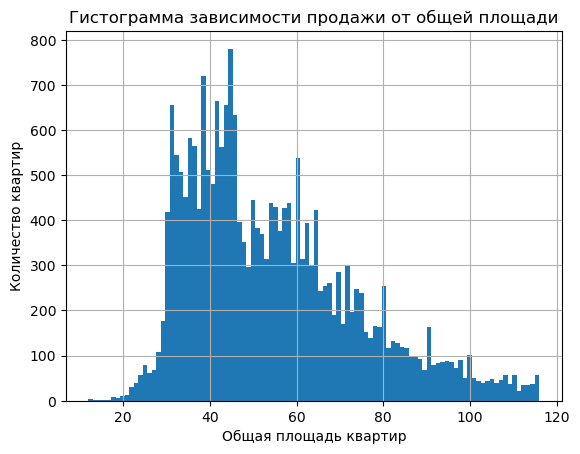

In [99]:
data['total_area'].plot(
    kind='hist',
    range=(12, 116),
    bins=100,
    grid=True,
    title = 'Гистограмма зависимости продажи от общей площади',
    xlabel = 'Общая площадь квартир',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от общей площади"** заметно, что самыми большими по объёму предложений являются квартиры площадью 50 кв.м. В целом, это средняя площадь квартир, которая, скорее всего, комфортна для покупателей (не слишком большая, но и не маленькая)*

In [101]:
data['living_area'].describe() #выделена описательная статистика

count    22519.000000
mean        31.082336
std         13.078142
min          2.000000
25%         19.000000
50%         30.000000
75%         39.100000
max        101.000000
Name: living_area, dtype: float64

*Анализируя описательную статистику, видно, что максимальное значение жилой площади не превышает максимальное значение общей площади и немного меньше, что соответствует логике, так как помимо жилой площади должна быть ещё и нежилая (😅)*

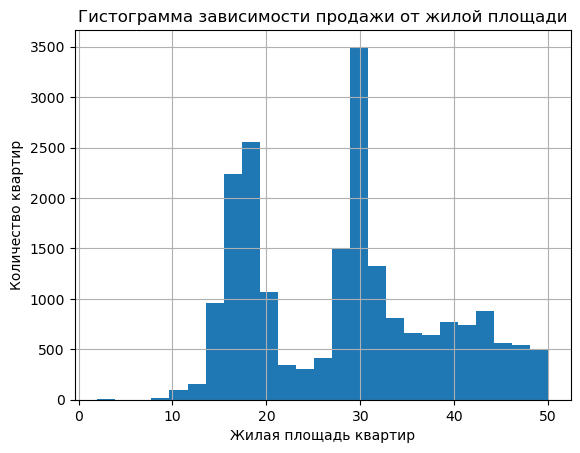

In [103]:
data['living_area'].plot(
    kind='hist',
    range=(2, 50),
    bins=25,
    grid=True,
    title = 'Гистограмма зависимости продажи от жилой площади',
    xlabel = 'Жилая площадь квартир',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от жилой площади"** заметно, что у нас присутствуют два пика. Это означает, что достаточно много предложений по продаже квартир с площадью примерно 17 и 30 м.кв.*

In [105]:
data['kitchen_area'].describe() #выделена описательная статистика

count    22519.000000
mean         9.844479
std          4.202170
min          1.300000
25%          7.100000
50%          9.000000
75%         11.000000
max         60.000000
Name: kitchen_area, dtype: float64

*Здесь тоже всё хорошо, аномальных значений нет, так как максимальное значение площади кухни меньше, чем максимальное значение общей площади, так ещё и в два раза*

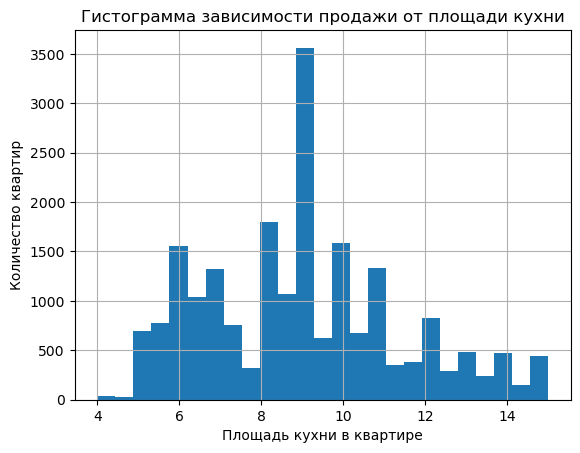

In [107]:
data['kitchen_area'].plot(
    kind='hist',
    range=(4, 15),
    bins=25,
    grid=True,
    title = 'Гистограмма зависимости продажи от площади кухни',
    xlabel = 'Площадь кухни в квартире',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от площади кухни"** заметно, что чаще всего площадь кухни составляет 9 кв.м., но так же заметно, что часто во время продажи указываются целые числа площади кухней*

In [109]:
data['last_price'].describe() #выделена описательная статистика

count    2.251900e+04
mean     5.331239e+06
std      3.439449e+06
min      1.219000e+04
25%      3.370000e+06
50%      4.500000e+06
75%      6.300000e+06
max      8.200000e+07
Name: last_price, dtype: float64

*Здесь ситуация аналогичная с общей площадью, заметны аномальные значения. Уберем их, также введя 97-ый процентиль*

In [111]:
data = data[data['last_price'] <= data['last_price'].quantile(0.97)]
data['last_price'].describe()

count    2.184300e+04
mean     4.934047e+06
std      2.377314e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.450000e+06
75%      6.050000e+06
max      1.320000e+07
Name: last_price, dtype: float64

*Теперь всё выглядит правдободобно и прекрасно*

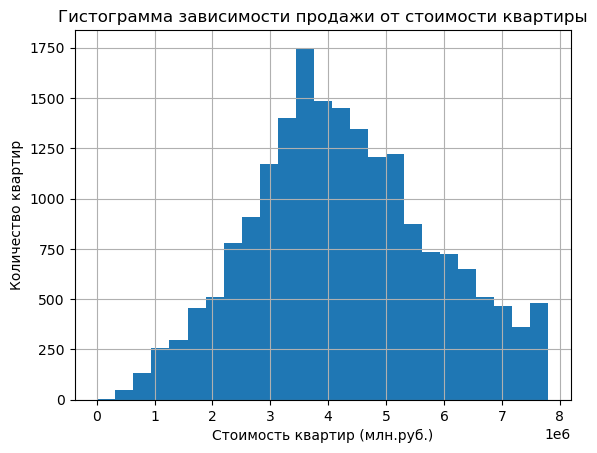

In [113]:
data['last_price'].plot(
    kind='hist',
    range=(1.219000e+04, 7.800000e+06),
    bins=25,
    grid=True,
    title = 'Гистограмма зависимости продажи от стоимости квартиры',
    xlabel = 'Стоимость квартир (млн.руб.)',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от стоимости квартиры"** заметно, что самой популярной ценой продажи квартиры является примерно 3.5 млн.руб.*

In [115]:
data['rooms'].describe() #выделена описательная статистика

count    21843.000000
mean         1.929726
std          0.897175
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

*Видим, что здесь присутствуют аномальные значения. Будем считать, что количество комнат от 1 до 6*

In [117]:
data = data[(data['rooms'] >= 1) & (data['rooms'] <= 6)]
data['rooms'].describe()

count    21648.000000
mean         1.947108
std          0.882228
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

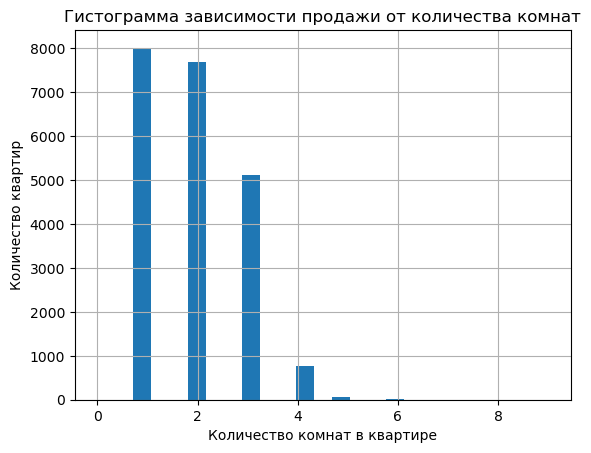

In [118]:
data['rooms'].plot(
    kind='hist',
    range=(0, 9),
    bins=25,
    grid=True,
    title = 'Гистограмма зависимости продажи от количества комнат',
    xlabel = 'Количество комнат в квартире',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от количества комнат"** заметно, что чаще всего выставляются на продажу квартиры с одной или двумя комнатами*

In [120]:
data['ceiling_height'].describe() #выделена описательная статистика 

count    21648.000000
mean         2.722376
std          0.220742
min          1.000000
25%          2.600000
50%          2.770000
75%          2.770000
max         14.000000
Name: ceiling_height, dtype: float64

*Хоть и в разделе **"Предобработка данных"** мы сократили выборку, оставив только датасет с высотой потолков до 14 метров включительно, это всё равно является достаточно большим аномальным результатом. Оставим лишь квартиры с высотой потолков до 6 метров*

In [122]:
data = data[data['ceiling_height'] <= 6]
data['ceiling_height'].describe()

count    21642.000000
mean         2.720515
std          0.186837
min          1.000000
25%          2.600000
50%          2.770000
75%          2.770000
max          5.300000
Name: ceiling_height, dtype: float64

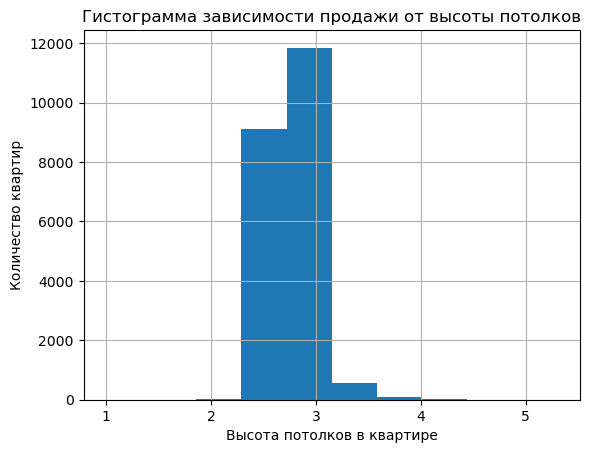

In [123]:
data['ceiling_height'].plot(
    kind='hist',
    range=(1, 5.3),
    bins=10,
    grid=True,
    title = 'Гистограмма зависимости продажи от высоты потолков',
    xlabel = 'Высота потолков в квартире',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от высоты потолков"** заметно, что чаще всего квартиры имеют высоту потолков, равню примерно 2.5-3 метра*

In [125]:
type_of_floor_hist = data['type_of_floor'].value_counts().reset_index() #создание датафрейма для столбчатой диаграммы
type_of_floor_hist.columns = ['type_of_floor', 'count'] 
type_of_floor_hist

,type_of_floor,count
0,другой,15863
1,последний,3017
2,первый,2762


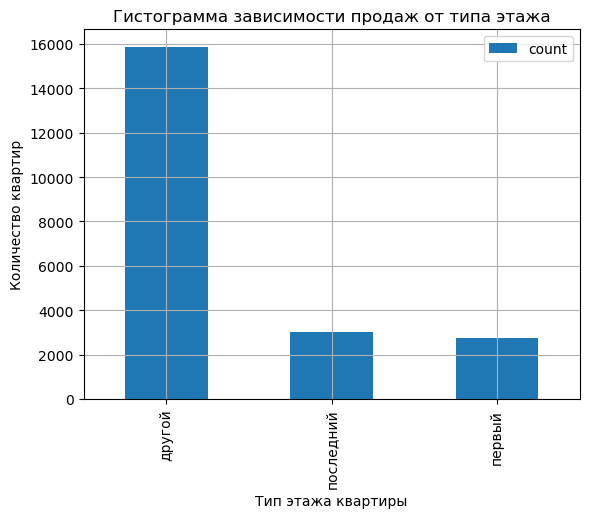

In [126]:
type_of_floor_hist.plot(
    kind='bar',
    x='type_of_floor',
    y='count',
    grid=True,
    title='Гистограмма зависимости продаж от типа этажа',
    xlabel='Тип этажа квартиры',
    ylabel='Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продаж от типа этажа"** заметно, что чаще всего продают квартиры не на крайних этажах, что соответствует логике*

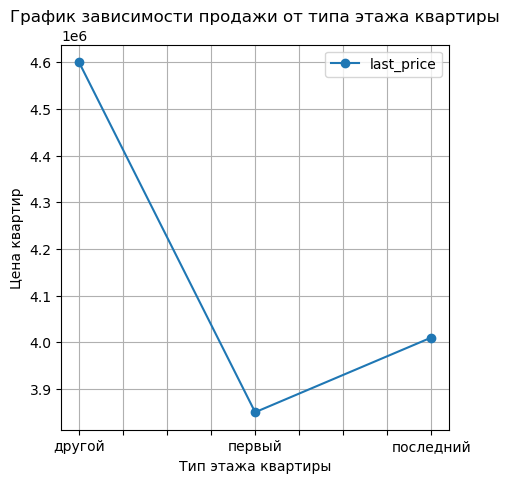

In [128]:
data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').plot(
    style='o-',
    grid=True,
    figsize=(5, 5),
    title = 'График зависимости продажи от типа этажа квартиры',
    xlabel = 'Тип этажа квартиры',
    ylabel = 'Цена квартир')
plt.show()

*Построив **"График зависимости продажи от типа этажа квартиры"** заметно, что бОльшую медианную сумму продаж составляют квартиры не на крайних этажах, что так же соотвествует логике*

In [130]:
data['floors_total'].describe() #выделена описательная статистика 

count    21570.000000
mean        10.748725
std          6.620314
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

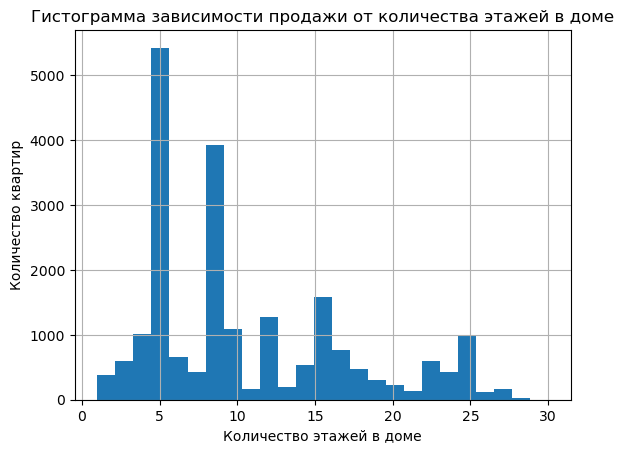

In [131]:
data['floors_total'].plot(
    kind='hist',
    range=(1, 30),
    bins=25,
    grid=True,
    title = 'Гистограмма зависимости продажи от количества этажей в доме',
    xlabel = 'Количество этажей в доме',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от количества этажей в доме"** заметно, что чаще всего дома имеют либо 5, либо 9 этажей*

In [133]:
data['city_centers_nearest'].describe() #выделена описательная статистика

count    16251.000000
mean        14.884253
std          8.519441
min          0.000000
25%         11.000000
50%         14.000000
75%         17.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

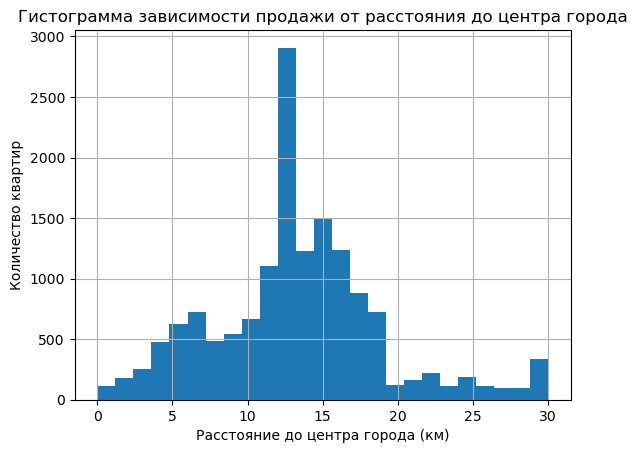

In [134]:
data['city_centers_nearest'].plot(
    kind='hist',
    range=(0, 30),
    bins=25,
    grid=True,
    title = 'Гистограмма зависимости продажи от расстояния до центра города',
    xlabel = 'Расстояние до центра города (км)',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от расстояния до центра города"** заметно, что чаще всего квартиры находятся от 13 до 16 км до центра города*

In [136]:
data['parks_nearest'].describe() #выделена описательная статистика 

count    6831.000000
mean      490.415459
std       332.554649
min         1.000000
25%       290.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

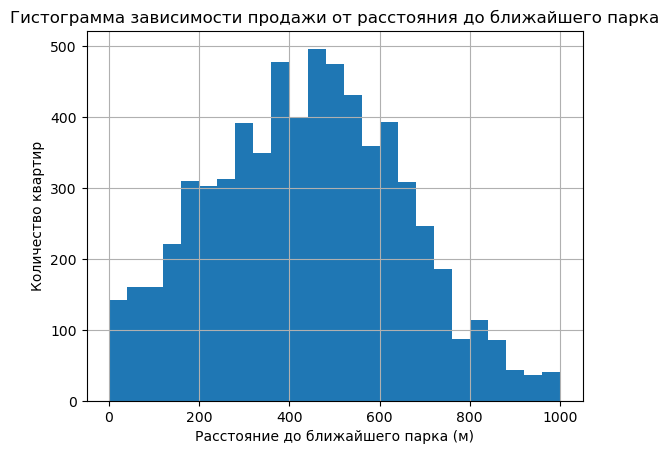

In [137]:
data['parks_nearest'].plot(
    kind='hist',
    range=(1, 1000),
    bins=25,
    grid=True,
    title = 'Гистограмма зависимости продажи от расстояния до ближайшего парка',
    xlabel = 'Расстояние до ближайшего парка (м)',
    ylabel = 'Количество квартир')
plt.show()

*Построив **"Гистограмму зависимости продажи от расстояния до ближайшего парка"** заметно, что чаще всего квартиры находятся от 300 до 500 м до ближайшего парка, что является очень близким растоянием*

*Теперь проверим, какой процент датасета мы отбросили после выявления аномалий. Для этого рассмотрим отношение количества строк нового датасета к количеству строк старого датасета*

In [140]:
new_data = data.shape[0]
otn = new_data / old_data
print('Количество отброшенных данных:', old_data - new_data)
proc = (1 - otn) * 100
print('Процент отброшенных данных:', (1 - otn) * 100)
if proc < 10:
    print('Процент отброшенных значений меньше 10, что соответствует норме')
else:
    print('Процент отброшенных значений больше 10, что НЕ соответствует норме. \n Необходимо уменьшить процентиль в аномальных значениях общей территории и/или стоимости квартиры')

Количество отброшенных данных: 2057
Процент отброшенных данных: 8.679691126207857
Процент отброшенных значений меньше 10, что соответствует норме


#### Вывод по первому шагу Исследовательского анализа
Были построены диаграммы, которые позволили выявить следующее:
- *Построив **"Гистограмму зависимости продажи от общей площади"** заметно, что самыми большими по объёму предложений являются квартиры площадью 50 кв.м. В целом, это средняя площадь квартир, которая, скорее всего, комфортна для покупателей (не слишком большая, но и не маленькая)*
- *Построив **"Гистограмму зависимости продажи от жилой площади"** заметно, что у нас присутствуют два пика. Это означает, что достаточно много предложений по продаже квартир с площадью примерно 17 и 30 м.кв.*
- *Построив **"Гистограмму зависимости продажи от площади кухни"** заметно, что чаще всего площадь кухни составляет 9 кв.м., но так же заметно, что часто во время продажи указываются целые числа площади кухней*
- *Построив **"Гистограмму зависимости продажи от стоимости квартиры"** заметно, что самой популярной ценой продажи квартиры является примерно 3.5 млн.руб.*
- *Построив **"Гистограмму зависимости продажи от количества комнат"** заметно, что чаще всего выставляются на продажу квартиры с одной или двумя комнатами*
- *Построив **"Гистограмму зависимости продажи от высоты потолков"** заметно, что чаще всего квартиры имеют высоту потолков, равню примерно 2.5-3 метра*
- *Построив **"Гистограмму зависимости продаж от типа этажа"** заметно, что чаще всего продают квартиры не на крайних этажах, что соответствует логике*
- *Построив **"График зависимости продажи от типа этажа квартиры"** заметно, что бОльшую медианную сумму продаж составляют квартиры не на крайних этажах, что так же соотвествует логике*
- *Построив **"Гистограмму зависимости продажи от количества этажей в доме"** заметно, что чаще всего дома имеют либо 5, либо 9 этажей*
- *Построив **"Гистограмму зависимости продажи от расстояния до центра города"** заметно, что чаще всего квартиры находятся от 13 до 16 км до центра города*
- *Построив **"Гистограмму зависимости продажи от расстояния до ближайшего парка"** заметно, что чаще всего квартиры находятся от 300 до 500 м до ближайшего парка, что является очень близким растоянием* <br>
<br >Если подвести итог и выявить среднестатистическую квартиру, которую продают, то это квартира 52 кв.м. с жилой площадью 30 кв.м., площадь кухни которой составляет 9 кв.м., стоит она примерно 3,5 млн.руб., имеют одну или две комнаты, высота потолка около 3 метров, находится не на крайних этажах, находится квартира в пятиэтажке, расстрояние до центра города составляет примерно 13 км, а до ближайшего парка – 450 метров 


In [146]:
data['days_exposition'].describe() #выделена описательная статистика сроков продажи квартир

count    18957.000000
mean       173.986760
std        211.807872
min          1.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1580.000000
Name: days_exposition, dtype: float64

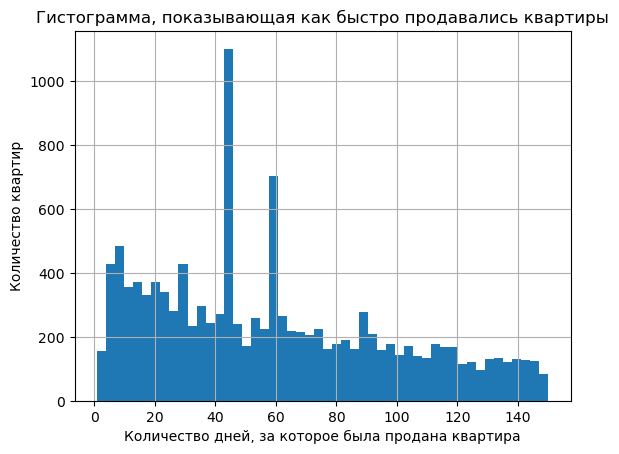

In [147]:
data['days_exposition'].plot(
    kind='hist',
    range=(1, 150),
    bins=50,
    grid=True,
    title = 'Гистограмма, показывающая как быстро продавались квартиры',
    xlabel = 'Количество дней, за которое была продана квартира',
    ylabel = 'Количество квартир')
plt.show()

In [148]:
data['days_exposition'].mean()

173.98675950836102

In [149]:
data['days_exposition'].median()

92.0

#### Вывод по второму шагу Исследовательского анализа
Была построена **"Гистограмма, показывающая как быстро продавались квартиры"**, согласно которой видно, что чаще всего квартиры продавались за примерно 45-60 дней (1,5-2 месяца), хотя если смотреть в общем и целом, то квартиры продавались за срок от 1 до 1580 дней. Среднее количество дней срока продажи составляет 181 день, а медианное значение – 95 дней. Исходя из полученных данных, можно предположить, что если квартира была продана за 45 дней (значение, равное первому квартилю), а долгой продажа будет считаться, если продана за срок больше, чем 232 дня (третий квартиль) 

In [152]:
correlation_matrix = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'weekday', 'month', 'year']].corr()
correlation_matrix.head(1).round(3)

,last_price,total_area,living_area,kitchen_area,rooms,floor,weekday,month,year
last_price,1.0,0.712,0.556,0.472,0.44,0.139,-0.017,0.008,-0.003


*После создания корреляционной матрицы заметна взаимосвязь (корреляция) между стоимостью объекта и общей площадью квартиры, жилой площади, площади кухни и совсем немного – количетсвом комнат. Далее выделим "нормальные" значения и исходя из них построим новую корреляционную матрицу*

In [154]:
columns_for_new_matrix = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor']
Q1 = data[columns_for_new_matrix].quantile(0.25) #первый квартиль
Q3 = data[columns_for_new_matrix].quantile(0.75) #третий квартиль
IQR = Q3 - Q1
data_for_new_correlation_matrix = data[(data[columns_for_new_matrix] > Q1 - 1.5*IQR) & (data[columns_for_new_matrix] < Q3 + 1.5*IQR)] #фильтруем строки, которые лежат между левым и правым усом
data_for_new_correlation_matrix.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,price_meter_square,weekday,month,year,type_of_floor
0,NaN,NaN,NaN,NaT,3.0,NaN,NaN,51.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3350000.0,40.4,NaT,1.0,NaN,NaN,18.6,1.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5196000.0,56.0,NaT,2.0,NaN,NaN,34.3,4.0,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,10000000.0,100.0,NaT,2.0,NaN,NaN,32.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2890000.0,30.4,NaT,1.0,NaN,NaN,14.4,5.0,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
new_correlation_matrix = data_for_new_correlation_matrix[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor']].corr()
new_correlation_matrix.head(1).round(3) #выводим корреляционную матрицу с округлением до трех знаков после точки

,last_price,total_area,living_area,kitchen_area,rooms,floor
last_price,1.0,0.656,0.503,0.423,0.417,0.151


*Анализируя вновь составленную корреляционную матрицу, в которой рассмотрены только нормальные значения, можно выявить зависимость (корреляцию) между ценой квартиры и её общей площадью (как следствие – жилой и кухонной площадью), также присутствует зависимость между ценой квартиры и количеством комнат. Для остальных показателей (этаж; день, месяц и год публикации объявления) зависимости не наблюдается. Корреляционная матрица не строилась для дня недели, месяца и года, так как цена от них зависит не линейно, так как это категориальные переменные – для них построены графики, где видно, что зависимость не наблюдается. Далее построим графики, которые покажут зависимость цены от указанных выше параметров*

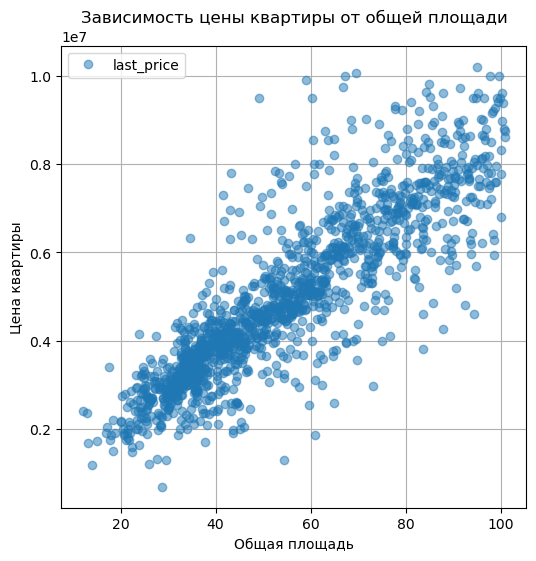

In [159]:
data_for_new_correlation_matrix.pivot_table(index='total_area', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(6, 6),
    xlabel = 'Общая площадь',
    ylabel = 'Цена квартиры',
    title= 'Зависимость цены квартиры от общей площади',
    alpha=0.5)
plt.show()

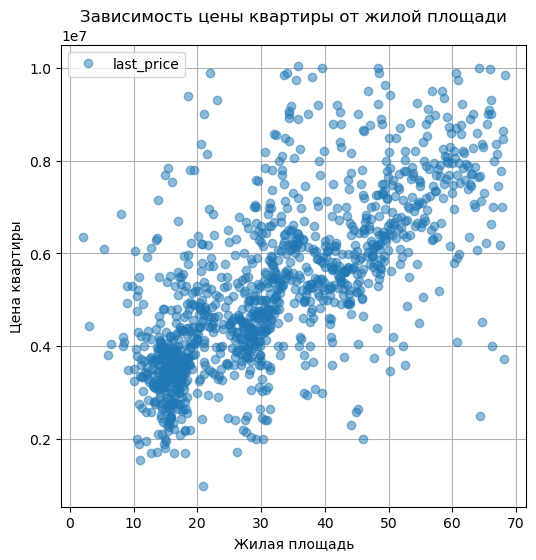

In [160]:
data_for_new_correlation_matrix.pivot_table(index='living_area', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(6, 6),
    xlabel = 'Жилая площадь',
    ylabel = 'Цена квартиры',
    title= 'Зависимость цены квартиры от жилой площади',
    alpha=0.5)
plt.show()

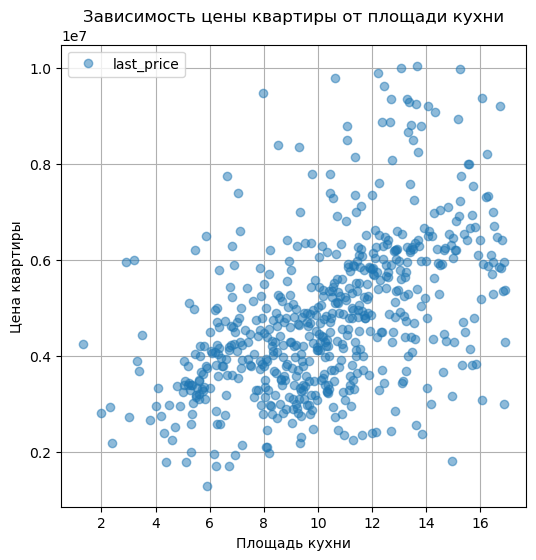

In [161]:
data_for_new_correlation_matrix.pivot_table(index='kitchen_area', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(6, 6),
    xlabel = 'Площадь кухни',
    ylabel = 'Цена квартиры',
    title= 'Зависимость цены квартиры от площади кухни',
    alpha=0.5)
plt.show()

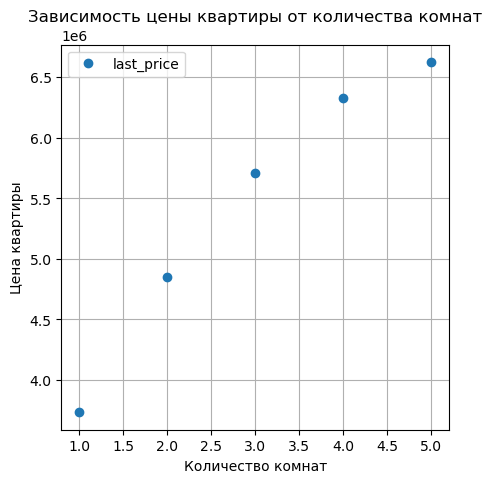

In [162]:
data_for_new_correlation_matrix.pivot_table(index='rooms', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(5, 5),
    xlabel = 'Количество комнат',
    ylabel = 'Цена квартиры',
    title= 'Зависимость цены квартиры от количества комнат')
plt.show()

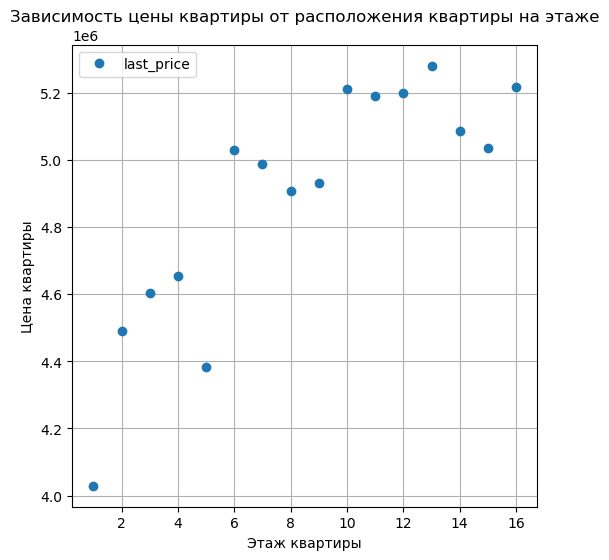

In [163]:
data_for_new_correlation_matrix.pivot_table(index='floor', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(6, 6),
    xlabel = 'Этаж квартиры',
    ylabel = 'Цена квартиры',
    title= 'Зависимость цены квартиры от расположения квартиры на этаже')
plt.show()

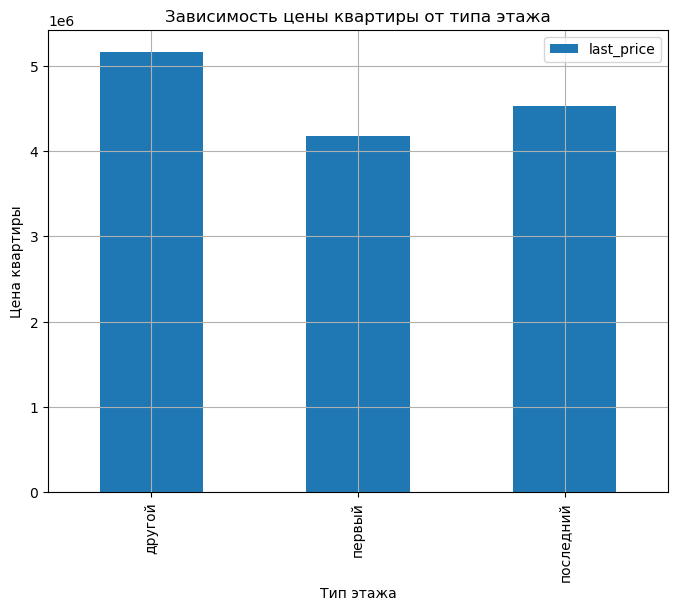

In [167]:
data.pivot_table(index='type_of_floor', values='last_price').plot(
    kind='bar', 
    figsize=(8, 6), 
    grid=True,
    xlabel='Тип этажа',
    ylabel='Цена квартиры',
    title='Зависимость цены квартиры от типа этажа')
plt.show()

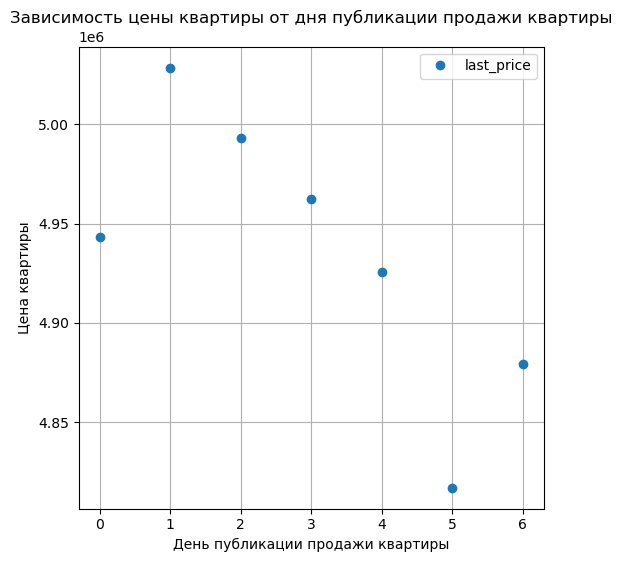

In [168]:
data.pivot_table(index='weekday', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(6, 6),
    xlabel = 'День публикации продажи квартиры',
    ylabel = 'Цена квартиры',
    title= 'Зависимость цены квартиры от дня публикации продажи квартиры')
plt.show()

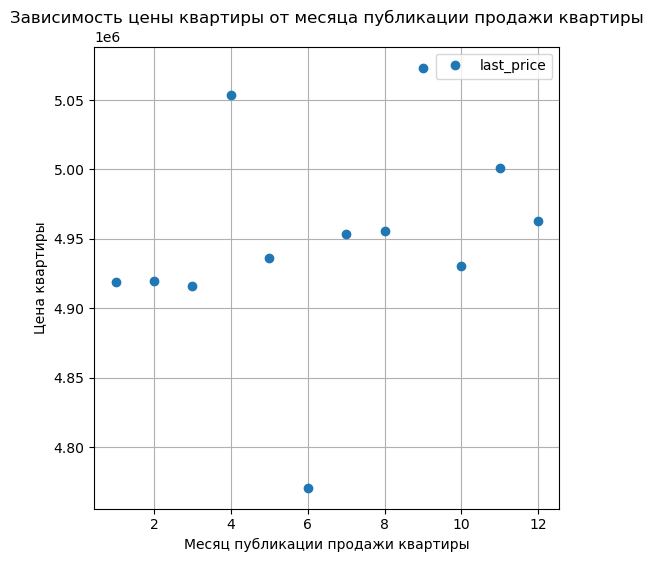

In [172]:
data.pivot_table(index='month', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(6, 6),
    xlabel = 'Месяц публикации продажи квартиры',
    ylabel = 'Цена квартиры',
    title= 'Зависимость цены квартиры от месяца публикации продажи квартиры')
plt.show()

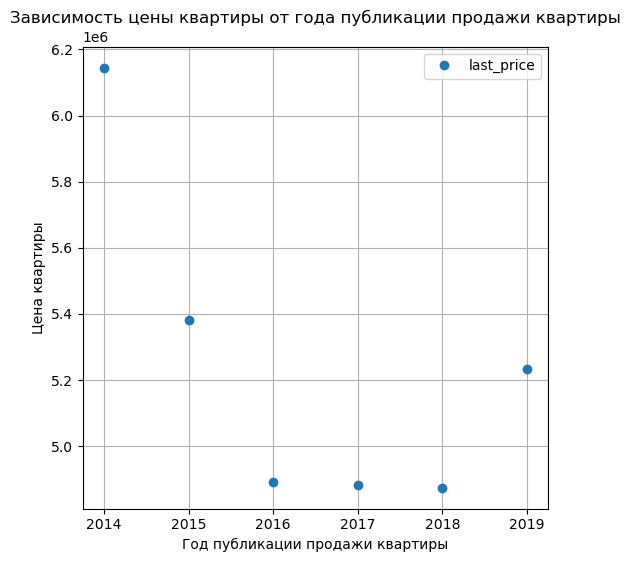

In [173]:
data.pivot_table(index='year', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(6, 6),
    xlabel = 'Год публикации продажи квартиры',
    ylabel = 'Цена квартиры',
    title= 'Зависимость цены квартиры от года публикации продажи квартиры')
plt.show()

#### Вывод по третьему шагу Исследовательского анализа
*В процессе анализа была создана корреляционная матрица из датасета **data** для того, чтобы определить факторы, которые больше всего влияют на общую (полную) стоимость объекта. Было изучено, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год). Изначально была заметна взаимосвязь (корреляция) между стоимостью объекта и общей площадью квартиры, жилой площади, площади кухни и совсем немного – количетсвом комнат. Далее были выделены "нормальные" значения и исходя из них построена новая корреляционная матрица* <br>
*Анализируя вновь составленную корреляционную матрицу, в которой рассмотрены только нормальные значения, можно выявить зависимость (корреляцию) между ценой квартиры и её общей площадью (как следствие – жилой и кухонной площадью), также присутствует зависимость между ценой квартиры и количеством комнат. Для остальных показателей (этаж; день, месяц и год публикации объявления) зависимости не наблюдается. Корреляционная матрица не строилась для дня недели, месяца и года, так как цена от них зависит не линейно, так как это категориальные переменные – для них построены графики, где видно, что зависимость не наблюдается. Далее построим графики, которые покажут зависимость цены от указанных выше параметров*

In [175]:
data_top_10 = data.pivot_table(index='locality_name', values='price_meter_square', aggfunc=['count', 'mean']) #создание сводной таблицы с количеством объявлений и средней ценой квадратного метра
data_top_10.columns = ['count', 'mean_price_meter_square'] #переименование столбцов в новой сводной таблице
data_top_10['mean_price_meter_square'] = data_top_10['mean_price_meter_square'].round(2) #округление среднего значения стоимости квадратного метра до двух знаков после точки 
data_top_10.sort_values(by='count', ascending=False).head(10) #сортировка сводной таблицы по количеству продаж от большего к меньшему и вывод первых 10 строк

,count,mean_price_meter_square
locality_name,,
санкт-петербург,13862,106469.99
мурино,562,85443.04
кудрово,450,95114.65
шушары,433,78431.64
всеволожск,388,67163.45
пушкин,340,100911.39
колпино,336,75370.03
парголово,322,90448.42
гатчина,303,68664.04


#### Вывод по четвертому шагу Исследовательского анализа
Была создана сводная таблица населеных пунктов с количеством объявлений и средней ценой квадратного метра, вдальнейшем таблица была отсортирована по количеству продаж от большего к меньшему и выведены топ-10 населеных пунктов. Согласно полученной сводной таблице, населеным пунктом в Ленинградской области, имеющим наибольшее число предложений по продаже недвижимости, является город Санкт-Петербург, где средняя цена за квадратный метр составляет 114849.01 рублей, наименьшее число в топ-10 занимает город Выборг, где средняя цена за квадратный метр равна 58141.91 рублей

In [178]:
spb_data = data[data['locality_name'] == 'санкт-петербург']

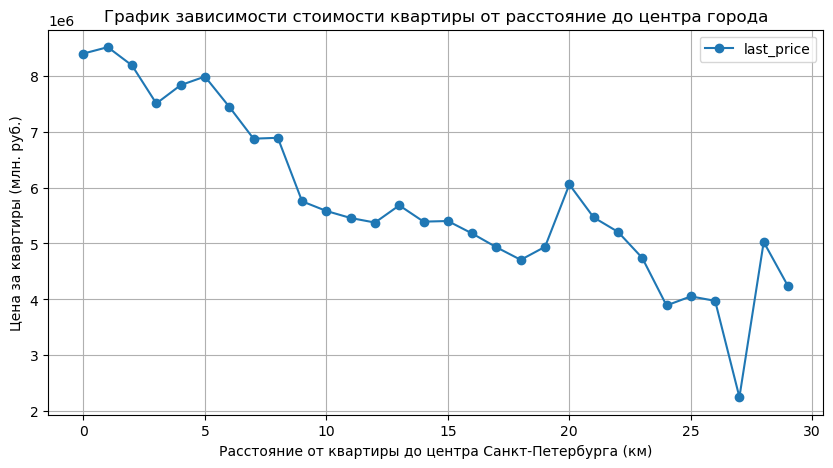

In [179]:
spb_data.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean').plot(
    style='o-',
    grid=True,
    figsize=(10,5),
    xlabel='Расстояние от квартиры до центра Санкт-Петербурга (км)',
    ylabel='Цена за квартиры (млн. руб.)',
    title='График зависимости стоимости квартиры от расстояние до центра города')
plt.show()

In [180]:
spb_data.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean')

,last_price
city_centers_nearest,
0.0,8.398000e+06
1.0,8.512566e+06
2.0,8.184883e+06
3.0,7.504489e+06
4.0,7.832483e+06
5.0,7.986261e+06
6.0,7.446104e+06
7.0,6.874820e+06
8.0,6.890416e+06


#### Вывод по пятому шагу Исследовательского анализа
На пятом шаге исследовательского анализа была составлена и рассмотрена сводная таблица зависимости стоимости квартиры от расстояния до центра города, а также графически визуализирован график, построенный на созданной таблице. Анализ таблицы и графика позволяет сделать вывод, что чаще всего чем дальше от центра города, тем дешевле квартиры, однако обратная сторона присутсвует в расстоянии от 4 до 6 км: цена за стоимость квартиры растёт 

### **Вывод по Исследовательскому анализу данных**
#### Вывод по первому шагу Исследовательского анализа
Были построены диаграммы, которые позволили выявить следующее:
- *Построив **"Гистограмму зависимости продажи от общей площади"** заметно, что самыми большими по объёму предложений являются квартиры площадью 52 кв.м. В целом, это средняя площадь квартир, которая, скорее всего, комфортна для покупателей (не слишком большая, но и не маленькая)*
- *Построив **"Гистограмму зависимости продажи от жилой площади"** заметно, что у нас присутствуют два пика. Это означает, что достаточно много предложений по продаже квартир с площадью примерно 17 и 30 м.кв.*
- *Построив **"Гистограмму зависимости продажи от площади кухни"** заметно, что чаще всего площадь кухни составляет 9 кв.м., но так же заметно, что часто во время продажи указываются целые числа площади кухней*
- *Построив **"Гистограмму зависимости продажи от стоимости квартиры"** заметно, что самой популярной ценой продажи квартиры является примерно 3.5 млн.руб.*
- *Построив **"Гистограмму зависимости продажи от количества комнат"** заметно, что чаще всего выставляются на продажу квартиры с одной или двумя комнатами*
- *Построив **"Гистограмму зависимости продажи от высоты потолков"** заметно, что чаще всего квартиры имеют высоту потолков, равню примерно 2.5-3 метра*
- *Построив **"Гистограмму зависимости продаж от типа этажа"** заметно, что чаще всего продают квартиры не на крайних этажах, что соответствует логике*
- *Построив **"График зависимости продажи от типа этажа квартиры"** заметно, что бОльшую медианную сумму продаж составляют квартиры не на крайних этажах, что так же соотвествует логике*
- *Построив **"Гистограмму зависимости продажи от количества этажей в доме"** заметно, что чаще всего дома имеют либо 5, либо 9 этажей*
- *Построив **"Гистограмму зависимости продажи от расстояния до центра города"** заметно, что чаще всего квартиры находятся от 13 до 16 км до центра города*
- *Построив **"Гистограмму зависимости продажи от расстояния до ближайшего парка"** заметно, что чаще всего квартиры находятся от 300 до 500 м до ближайшего парка, что является очень близким растоянием* <br>
<br >Если подвести итог и выявить среднестатистическую квартиру, которую продают, то это квартира 52 кв.м. с жилой площадью 30 кв.м., площадь кухни которой составляет 9 кв.м., стоит она примерно 3,5 млн.руб., имеют одну или две комнаты, высота потолка около 3 метров, находится не на крайних этажах, находится квартира в пятиэтажке, расстрояние до центра города составляет примерно 13 км, а до ближайшего парка – 450 метров 

#### Вывод по второму шагу Исследовательского анализа
Была построена **"Гистограмма, показывающая как быстро продавались квартиры"**, согласно которой видно, что чаще всего квартиры продавались за примерно 45-60 дней (1,5-2 месяца), хотя если смотреть в общем и целом, то квартиры продавались за срок от 1 до 1580 дней. Среднее количество дней срока продажи составляет 181 день, а медианное значение – 95 дней. Исходя из полученных данных, можно предположить, что если квартира была продана за 45 дней (значение, равное первому квартилю), а долгой продажа будет считаться, если продана за срок больше, чем 232 дня (третий квартиль) 

#### Вывод по третьему шагу Исследовательского анализа
*В процессе анализа была создана корреляционная матрица из датасета **data** для того, чтобы определить факторы, которые больше всего влияют на общую (полную) стоимость объекта. Было изучено, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год). Изначально была заметна взаимосвязь (корреляция) между стоимостью объекта и общей площадью квартиры, жилой площади, площади кухни и совсем немного – количетсвом комнат. Далее были выделены "нормальные" значения и исходя из них построена новая корреляционная матрица* <br>
*Анализируя вновь составленную корреляционную матрицу, в которой рассмотрены только нормальные значения, была повторно выявлена зависимость (корреляцая) между ценой квартиры и её общей площадью (как следствие – жилой и кухонной площадью), также присутствует зависимость между ценой квартиры и количеством комнат, но она является слабой. Для остальных показателей (этаж; день, месяц и год публикации объявления) зависимости не наблюдается. Были построены графики, которые визуально показали зависимость (корреляцию) цены от указанных выше параметров*

#### Вывод по четвертому шагу Исследовательского анализа
Была создана сводная таблица населеных пунктов с количеством объявлений и средней ценой квадратного метра, вдальнейшем таблица была отсортирована по количеству продаж от большего к меньшему и выведены топ-10 населеных пунктов. Согласно полученной сводной таблице, населеным пунктом в Ленинградской области, имеющим наибольшее число предложений по продаже недвижимости, является город Санкт-Петербург, где средняя цена за квадратный метр составляет 114849.01 рублей, наименьшее число в топ-10 занимает город Выборг, где средняя цена за квадратный метр равна 58141.91 рублей

#### Вывод по пятому шагу Исследовательского анализа
На пятом шаге исследовательского анализа была составлена и рассмотрена сводная таблица зависимости стоимости квартиры от расстояния до центра города, а также графически визуализирован график, построенный на созданной таблице. Анализ таблицы и графика позволяет сделать вывод, что чаще всего чем дальше от центра города, тем дешевле квартиры, однако обратная сторона присутсвует в расстоянии от 4 до 6 км: цена за стоимость квартиры растёт 

## Напишите общий вывод

Было проведено Исследование объявлений по продаже квартир, в ходе которого было совершено знакомство с даннымми, выполнена Предобработка данных и Исследовательский анализ данных: заменены пропуски, обработаны неявные дубликаты, выявлены закономерности – более подробные пошаговые выводы представлены ниже: <br>
### **Вывод по первому знакомству с датафреймом**
В файле 23699 записи, 22 столбца, присутствует некорректный тип столбца, присутствуют пропущенные значения в большинстве столбцов, отсутствуют явные дубликаты. Перейдем к Предобработке данных
### **Вывод по Предобработке данных**
Был изучен исходный файл, построены первые гистограммы для визуализации данных, найдены пропущенные значения, пропущенные значения заполнены там, где это возможно, объяснено, какие пропущенные значения обнаружены, в каждом столбце установлен корректный тип данных, объяснено, в каких столбцах изменён тип данных и почему, устранены неявные дубликаты в названиях населённых пунктов. Более подробная информация по ходу исследования представлена ниже:<br>
- *Первый столбец, в котором пропущены значения – это высота потолков (**ceiling_height**). Заменем пропущенные значения в данном столбце на медианную высоту потолков во всем датасете*. <br> 
- *Видно, что высота потолков некоторых квартир достигает более 15 метров, что является слишком странным и неправдоподобным. Скорее всего, это связано с ошибкой в заполнении таблицы или переносе данных, и значения ввелись в сантиметрах. Для этого поделим значения больше 15 на 10 см* <br>
- *Следующий столбец с пропущенными значениями – **floors_total** (количество этажей в доме). Мы не можем точно сказать, какое конкретное количество этажей находится в том или ином доме. Безусловно, мы понимаем, что максимальное количество этажей больше или равно тому, на котором расположена квартира, но конкретную цифру назвать нельзя. Также мы можем попробовать заменить значение на медианное, но это исказит общие данные, особенно если квартира находится на этаже выше, чем медианное значение. Именно поэтому оставим пропущенные данные в столбцах, к тому же этих строк немного (86 из 23699), данная выборка почти не повлияет на дальнейший анализ* <br>
- *Следующий столбец с пропущенными значениями – **living_area** (жилая площадь в квадратных метрах (м²)). Нам необходимо заполнить пропуски. Для этого разделим датасет на 6 подгрупп по площади по столбцу **total_area**, к каждой группе найдем меидану и заполним ею пропуски* <br>
- *Следующий столбец с пропущенными значениями – **is_apartment** (апартаменты (булев тип)). Для того, чтобы заполнить пропуски в данном столбце, необходимо сначала посчитать общую долю аппартаментов (т.к. True равно по значению 1)* <br> *Видно, что доля равна 0,018 – это примерно 2% из всего датасета квартиры имеют статус "апартаменты", что логически похоже на верную трактовку. Скорее всего, при заполнении таблицы человек или машина автоматически пропускали данный столбец, считая, что если не указал ничего, то, значит, **False**. Поэтому заполним пропущенный данные **"False"***
- *Следующий столбец с пропущенными значениями – **kitchen_area** (площадь кухни в квадратных метрах (м²)). Заполним его по аналогии с медианной площадью квартиры в группе* <br>
- *Следующий столбец с пропущенными значениями – **balcony** (число балконов). Скорее всего, в квартире нет балкона, поэтому владелец квартиры или составитель таблицы решил не вписывать число балконов, именно поэтому заменем пропущенные значение столбца на 0* <br>
- *Следующий столбец с пропущенными значениями – **locality_name** (название населённого пункта). По таблице невозможно определить название населенного пункта в строках с пропущенной ячейкой, поэтому оставим пропуски в данных* <br>
- *Следующий столбец с пропущенными значениями – **airports_nearest** (расстояние до ближайшего аэропорта в метрах (м)). Самостоятельно мы не можем узнать расстояние до аэропорта, поэтому оставим данные с пропусками. Возможно, пропуски присутствуют из-за того, что аэропорт находится слишком далеко от местоположения квартиры* <br>
- *Следующие столбцы с пропущенными значениями – **city_centers_nearest** (расстояние до центра города (м)), **parks_nearest** (расстояние до ближайшего парка (м)), **ponds_nearest** (расстояние до ближайшего водоёма (м)), **days_exposition** (сколько дней было размещено объявление (от публикации до снятия)). Эти данные с пропущенными значениями трогать не будем, т.к.: <br>
 **city_centers_nearest** – скорее всего, квартира находится слишком далеко относительно центра города, поэтому мы не можем заполнить данные, тк не обладаем дополнительной информацией с адресом квартиры <br>
**parks_nearest** – аналогично с **city_centers_nearest** <br>
**ponds_nearest** – аналогично с **city_centers_nearest** <br>
**days_exposition** – если не указано количество дней, то, скорее всего, квартира ещё не продана и находится в продаже до сих пор* <br>
- *Следующие столбцы с пропущенными значениями – **parks_around3000** (число парков в радиусе 3 км), **ponds_around3000** (число водоёмов в радиусе 3 км). Скорее всего, в радиусе 3км от квартиры нет парков и водоёмов, именно поэтому мы заполним пропуски 0*
- *В процессе устранения неявных дубликатов в столбце **'locality_name'** были заменены буквы "ё" на "е", все названия приведены к нижнему регистру, удалены типы населёных пунктов, в итоге сократилось 58 значений, в результате чего осталось 306 уникальных названий населеных пунктов. В конце было вновь проверено наличие явных дубликатов – таковых не оказалось*

### **Вывод по этапу "Добавление столбцов"**
В ходе данного этапаа были добавлены или обратаны некоторые столбцы, которые в будущем помогут нам для дальнейшего Исследовательского анализа. Более подробные выводы представлены ниже: <br>
- *В столбец **price_meter_square** была добавлена стоимость одного квадратного метра квартиры путём деления цены квартиры на её общую площадь и округления до двух знаков после запятой*
- *В отдельный столбец **day_of_week** был выделен день недели: 0 - понедельник, 1 - вторник и т.д.*
- *В отдельный столбец **month** был выделен день недели: 1 - январь, 2 - февраль и т.д.*
- *В отдельный столбец **year** был выделен из столбца **first_day_exposition** год публикации объявления*
- *В отдельный столбец **type_of_floor** с помощью создания функции и применения её к датасету было выделено, какой тип этажа представлен у квартиры ("первый", "последний" или "другой")* 
- *В столбце **city_centers_nearest** расстояние до центра города в километрах было переведено из м в км и округлено до целого значения*

### **Вывод по Исследовательскому анализу данных**
#### Вывод по первому шагу Исследовательского анализа
Были построены диаграммы, которые позволили выявить следующее:
- *Построив **"Гистограмму зависимости продажи от общей площади"** заметно, что самыми большими по объёму предложений являются квартиры площадью 52 кв.м. В целом, это средняя площадь квартир, которая, скорее всего, комфортна для покупателей (не слишком большая, но и не маленькая)*
- *Построив **"Гистограмму зависимости продажи от жилой площади"** заметно, что у нас присутствуют два пика. Это означает, что достаточно много предложений по продаже квартир с площадью примерно 17 и 30 м.кв.*
- *Построив **"Гистограмму зависимости продажи от площади кухни"** заметно, что чаще всего площадь кухни составляет 9 кв.м., но так же заметно, что часто во время продажи указываются целые числа площади кухней*
- *Построив **"Гистограмму зависимости продажи от стоимости квартиры"** заметно, что самой популярной ценой продажи квартиры является примерно 3.5 млн.руб.*
- *Построив **"Гистограмму зависимости продажи от количества комнат"** заметно, что чаще всего выставляются на продажу квартиры с одной или двумя комнатами*
- *Построив **"Гистограмму зависимости продажи от высоты потолков"** заметно, что чаще всего квартиры имеют высоту потолков, равню примерно 2.5-3 метра*
- *Построив **"Гистограмму зависимости продаж от типа этажа"** заметно, что чаще всего продают квартиры не на крайних этажах, что соответствует логике*
- *Построив **"График зависимости продажи от типа этажа квартиры"** заметно, что бОльшую медианную сумму продаж составляют квартиры не на крайних этажах, что так же соотвествует логике*
- *Построив **"Гистограмму зависимости продажи от количества этажей в доме"** заметно, что чаще всего дома имеют либо 5, либо 9 этажей*
- *Построив **"Гистограмму зависимости продажи от расстояния до центра города"** заметно, что чаще всего квартиры находятся от 13 до 16 км до центра города*
- *Построив **"Гистограмму зависимости продажи от расстояния до ближайшего парка"** заметно, что чаще всего квартиры находятся от 300 до 500 м до ближайшего парка, что является очень близким растоянием* <br>
<br >Если подвести итог и выявить среднестатистическую квартиру, которую продают, то это квартира 52 кв.м. с жилой площадью 30 кв.м., площадь кухни которой составляет 9 кв.м., стоит она примерно 3,5 млн.руб., имеют одну или две комнаты, высота потолка около 3 метров, находится не на крайних этажах, находится квартира в пятиэтажке, расстрояние до центра города составляет примерно 13 км, а до ближайшего парка – 450 метров 

#### Вывод по второму шагу Исследовательского анализа
Была построена **"Гистограмма, показывающая как быстро продавались квартиры"**, согласно которой видно, что чаще всего квартиры продавались за примерно 45-60 дней (1,5-2 месяца), хотя если смотреть в общем и целом, то квартиры продавались за срок от 1 до 1580 дней. Среднее количество дней срока продажи составляет 181 день, а медианное значение – 95 дней. Исходя из полученных данных, можно предположить, что если квартира была продана за 45 дней (значение, равное первому квартилю), а долгой продажа будет считаться, если продана за срок больше, чем 232 дня (третий квартиль) 

#### Вывод по третьему шагу Исследовательского анализа
*В процессе анализа была создана корреляционная матрица из датасета **data** для того, чтобы определить факторы, которые больше всего влияют на общую (полную) стоимость объекта. Было изучено, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год). Изначально была заметна взаимосвязь (корреляция) между стоимостью объекта и общей площадью квартиры, жилой площади, площади кухни и совсем немного – количетсвом комнат. Далее были выделены "нормальные" значения и исходя из них построена новая корреляционная матрица* <br>
*Анализируя вновь составленную корреляционную матрицу, в которой рассмотрены только нормальные значения, можно выявить зависимость (корреляцию) между ценой квартиры и её общей площадью (как следствие – жилой и кухонной площадью), также присутствует зависимость между ценой квартиры и количеством комнат. Для остальных показателей (этаж; день, месяц и год публикации объявления) зависимости не наблюдается. Корреляционная матрица не строилась для дня недели, месяца и года, так как цена от них зависит не линейно, так как это категориальные переменные – для них построены графики, где видно, что зависимость не наблюдается. Далее построим графики, которые покажут зависимость цены от указанных выше параметров*

#### Вывод по четвертому шагу Исследовательского анализа
Была создана сводная таблица населеных пунктов с количеством объявлений и средней ценой квадратного метра, вдальнейшем таблица была отсортирована по количеству продаж от большего к меньшему и выведены топ-10 населеных пунктов. Согласно полученной сводной таблице, населеным пунктом в Ленинградской области, имеющим наибольшее число предложений по продаже недвижимости, является город Санкт-Петербург, где средняя цена за квадратный метр составляет 114849.01 рублей, наименьшее число в топ-10 занимает город Выборг, где средняя цена за квадратный метр равна 58141.91 рублей

#### Вывод по пятому шагу Исследовательского анализа
На пятом шаге исследовательского анализа была составлена и рассмотрена сводная таблица зависимости стоимости квартиры от расстояния до центра города, а также графически визуализирован график, построенный на созданной таблице. Анализ таблицы и графика позволяет сделать вывод, что чаще всего чем дальше от центра города, тем дешевле квартиры, однако обратная сторона присутсвует в расстоянии от 4 до 6 км: цена за стоимость квартиры растёт 